In [1]:
import pandas as pd
import datetime
import random

from sqlalchemy import create_engine

from password import hoop_pwd
pwd = hoop_pwd.password

from nba_seer import *

modules imported
functions defined


In [2]:
# create sql conn and load game stats logs ----------------------

conn = create_engine('mysql+pymysql://root:%s@118.190.202.87:3306/nba_stats' % pwd)
game_stats_logs = pd.read_sql_table('game_stats_logs', conn)
game_stats_logs = game_stats_logs[game_stats_logs['GAME_TYPE'] != 'all_star']

print(str(len(game_stats_logs)) + ' player stats loaded.')

183649 player stats loaded.


In [3]:
# load player list ----------------------

all_players = nba_py.player.PlayerList(season='2017-18').info()

print('players list loaded')

players list loaded


In [4]:
def get_score(row):
    player_id = row['PERSON_ID']
    game_id = row['GAME_ID']
    stats = game_stats_logs[(game_stats_logs['PLAYER_ID'] == player_id) & 
                            (game_stats_logs['GAME_ID'] == game_id)].copy()
    #print(stats)
    stats['SCO'] = stats['PTS'] * 1 + stats['AST'] * 1.5 + \
    stats['OREB'] * 1 + stats['DREB'] * 0.7 + \
    stats['STL'] * 2 + stats['BLK'] * 1.8 + stats['TO'] * -1 + \
    stats['FGM'] * 0.4 + (stats['FGA'] - stats['FGM']) * -1 + stats['FG3M'] * 0.5
    return stats['SCO'].max()

In [5]:
game_date = game_stats_logs['GAME_DATE_EST'].drop_duplicates().apply(lambda x: x[:10])

In [48]:
players = pd.DataFrame()
for i in random.sample(list(game_date), 5):
    j = datetime.datetime.strptime(i, "%Y-%m-%d").date()
    games = get_games(j)
    players = players.append(get_players_p(games, game_stats_logs))
    print(str(j) + ' complete!')
else:
    print(len(players), ' players total!')

2016-11-18 complete!
2016-12-29 complete!
2013-01-12 complete!
2017-03-18 complete!
2015-10-14 complete!
990  players total!


In [49]:
players = get_exp_sco(players, game_stats_logs)

players['ACT_SCO'] = players.apply(get_score, axis = 1)
players['SCO_DIFF'] = players['EXP_SCO'] - players['ACT_SCO']
players['SCO_DIFF_PCT'] = players['SCO_DIFF'] / players['ACT_SCO']
print('test data loaded!')

ma20 complete!
ma10 complete!
ma5 complete!
min20 complete!
min10 complete!
min5 complete!
min_cov_20 complete!
sco_cov_20 complete!
sco cov less than 0 droped!
all done!
test data loaded!


In [58]:
players = players[(players['ACT_SCO'] != 0) & (players['ACT_SCO'].notnull())]

In [59]:
players.sort_values('SCO_COV_20')

,PERSON_ID,TEAM_ID,Location,GAME_ID,Against_Team_ID,MA_20,MA_10,MA_5,MIN_20,MIN_10,MIN_5,MIN_COV_20,SCO_COV_20,EXP_SCO,ACT_SCO,SCO_DIFF,SCO_DIFF_PCT
74,202808,1610612751,HOME,0011500059,1610612738,26.13,26.13,26.13,16.11,16.11,16.11,0.492,0.033,11.69,7.4,4.290000e+00,5.797297e-01
76,202712,1610612751,HOME,0011500059,1610612738,20.71,20.71,20.71,20.65,20.65,20.65,0.306,0.130,11.88,10.9,9.800000e-01,8.990826e-02
147,1626189,1610612737,HOME,0011500060,1610612759,22.49,22.49,22.49,9.46,9.46,9.46,0.019,0.138,5.91,1.2,4.710000e+00,3.925000e+00
192,2544,1610612748,AWAY,0021200548,1610612758,38.03,37.16,32.27,39.52,41.24,40.66,0.111,0.190,40.27,46.7,-6.430000e+00,-1.376874e-01
117,203497,1610612762,AWAY,0021601032,1610612741,31.65,31.48,33.26,33.76,34.38,36.47,0.136,0.193,31.12,29.9,1.220000e+00,4.080268e-02
78,203497,1610612762,HOME,0021600489,1610612755,31.04,32.61,30.45,34.63,35.06,35.45,0.103,0.198,30.54,27.5,3.040000e+00,1.105455e-01
67,202322,1610612764,AWAY,0021601030,1610612766,36.57,37.24,36.84,38.09,37.16,37.83,0.093,0.201,38.62,28.2,1.042000e+01,3.695035e-01
36,1626157,1610612750,HOME,0011500058,1610612761,29.93,29.93,29.93,24.68,24.68,24.68,0.118,0.212,20.52,20.1,4.200000e-01,2.089552e-02
119,200768,1610612761,AWAY,0021600490,1610612756,36.51,37.36,39.29,36.21,36.47,36.51,0.088,0.219,38.14,33.1,5.040000e+00,1.522659e-01
143,204002,1610612737,HOME,0011500060,1610612759,52.32,52.32,52.32,11.39,11.39,11.39,0.001,0.219,16.55,11.3,5.250000e+00,4.646018e-01


In [60]:
players['SCO_DIFF_PCT'].describe()

count    805.000000
mean       0.824998
std        9.165806
min      -85.100000
25%       -0.347187
50%        0.013684
75%        0.651351
max      109.900000
Name: SCO_DIFF_PCT, dtype: float64

In [61]:
players['SCO_DIFF'].describe()

count    805.000000
mean       0.450870
std        8.507707
min      -36.540000
25%       -4.680000
50%        1.090000
75%        5.990000
max       33.800000
Name: SCO_DIFF, dtype: float64

In [62]:
cov_diff = pd.DataFrame()
#cov_diff['cov'] = abs(players[['MIN_COV_20', 'SCO_COV_20']].mean(axis = 1))
cov_diff['cov'] = abs(players['MIN_COV_20'] * players['SCO_COV_20'])
cov_diff['diff'] = abs(players['SCO_DIFF_PCT'])
cov_diff.sort_values('cov')

,cov,diff
143,0.000219,0.464602
147,0.002622,3.925000
91,0.003596,0.729658
74,0.016236,0.579730
67,0.018693,0.369504
119,0.019272,0.152266
78,0.020394,0.110545
192,0.021090,0.137687
42,0.022320,2.503704
66,0.023182,0.015678


In [63]:
cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)]

,cov,diff
0,0.121656,0.494444
1,0.126318,0.121250
2,0.118800,0.574862
3,0.073125,0.342319
4,0.129456,0.201742
5,0.105885,0.375294
6,0.130476,0.200000
8,0.193128,0.371212
13,0.096232,0.301923
14,0.084960,0.280495


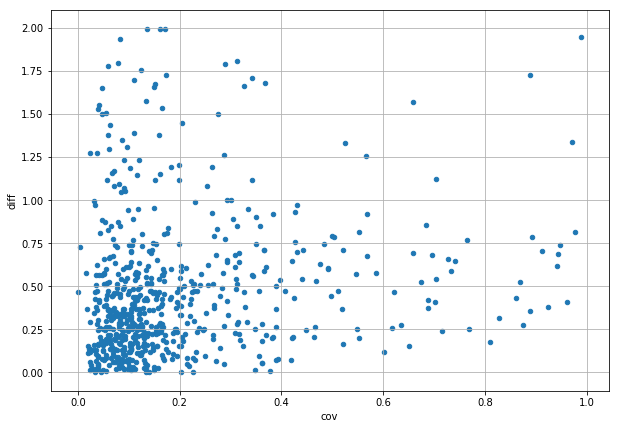

In [64]:
%matplotlib inline
cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)].plot(x='cov', y='diff', kind='scatter', grid=True, figsize=(10, 7))

In [65]:
cov_diff_1 = cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)]
cov_diff_1['cov'].corr(cov_diff_1['diff'])

0.17608915540489178

In [33]:
game_logs_test = get_last_n_game_logs(game_stats_logs, 201948, '1300201154', 20)

In [34]:
game_logs_test

,MINS,PTS,AST,OREB,DREB,STL,BLK,TO,FGM,FGA,FG3M
53406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56307,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
57435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58355,1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
get_score_36(game_logs_test)

(1.2846106679467133, 25.612681226349299)